# g01e03_barraPesas

[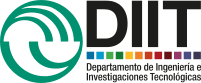](https://ingenieria.unlam.edu.ar/)    
[by-nc-sa_80x15.png](https://creativecommons.org/licenses/by-sa/4.0/deed.es_ES) 
2021 [Víctor A. Bettachini](mailto:vbettachini@unlam.edu.ar)  

---

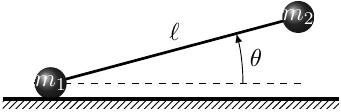

Una barra rígida de longitud \\(\ell\\) conecta dos esferas de masa \\(m_1\\) y \\(m_2\\).
Sobre una superficie se apoya la de \\(m_1\\) pero se sostiene la barra formando un ángulo \\(\theta\\) con la horizontal.
La superficie no presenta rozamiento a las esferas.
Considere las esferas puntuales y despreciable la masa de la barra.

Pregunta coneceptual:
No hay rozamiento. ¿Qué sucede entonces con el momento en la dirección horizontal?
¿Qué consecuencia tiene esto en la coordenada horizontal del centro de masa?

**Determine**:
Donde golpea \\(m_2\\) a la superficie tras soltar la barra.

## Resolución

In [1]:
import sympy as sym # importamos funciones de cálculo simbólico
from sympy.physics import mechanics as mech # de sympy utilizaremos funciones de mecánica
mech.init_vprinting() # notación con punto para la velocidad y punto punto para la aceleración
import warnings
warnings.filterwarnings("ignore")

In [2]:
# parámetros físicos del sistema
m1, m2, l = sym.symbols('m_1, m_2, \ell', positive=True)

# variables del sistema
x1, x2, theta = sym.symbols('x_1, x_2, theta')

La única coordenada que es relevante es la horizontal que llamamos $x$.
Establezco el origen del sistema de coordenadas en la posición que inicialmente ocupa el peso de $m_1$.
Con esto puede calcularse la coordenada en $x$ del centro de masa 

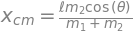

In [3]:
x_cm_antes = sym.Eq(sym.Symbol('x_{cm}'),
                    (m1* 0 + m2* l* sym.cos(theta) )/ (m1 + m2)
                   )
x_cm_antes          

Como no hay rozamiento con la superficie el momento del centro de masa se conserva.
Este originalmente era nulo pues la barra se deja caer, por tanto el $x_{cm}$ no varia en todo el proceso.

Si tras la caida los pesos estarán en unas posiciones $x_1$ y $x_2$ la expresión para el $x_{cm}$ en este caso es

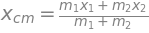

In [4]:
x_cm_después = sym.Eq(sym.Symbol('x_{cm}'),
                    (m1* x1 + m2* x2 )/ (m1 + m2)
                   )
x_cm_después

Por la antedicho ambas expresiones para $x_{cm}$ se pueden igualar.

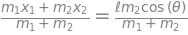

In [5]:
x_cm_igualar = sym.Eq(x_cm_después.rhs, x_cm_antes.rhs) # rhs: lado derecho
x_cm_igualar

Y la masa total del sistema simplificarse.

In [6]:
x_cm_igualar2 = sym.Eq(x_cm_igualar.lhs* (m1+m2),
                       x_cm_igualar.rhs *(m1+m2)
                      ) # lhs: lado izquierdo
x_cm_igualar2

Es claro que necesitamos otra relación para obtener $x_1$ y $x_2$.
Esta es la de la longitud de la barra $\ell$.
Sabemos que $x_1 < 0$ pues originalmente estaba en el origen, por tanto su signo será negativo.

In [7]:
barra = sym.Eq(l, -x1 + x2 )
barra

De aquí se ve que podemos reemplazar $x_2$ en la expresión que se obtuvo con el $x_{cm}$.

In [8]:
x2_barra = sym.Eq(x2, sym.solve(barra,x2)[0])
# x2_barra = sym.Eq(x2, sym.solveset(barra,x2).args[0]) # una alternativa
x2_barra

In [9]:
x1_igualar = x_cm_igualar2.subs(x2, x2_barra.rhs) # substituyo x2
x1_igualar

De aquí se despeja $x_1$

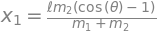

In [10]:
x1_final = sym.Eq(x1, sym.solveset(x1_igualar, x1).args[0] )
x1_final

Y reemplazando $x_1$ en la expresión de $\ell$ se obtiene $x_2$

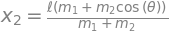

In [11]:
x2_final = x2_barra.subs(x1, x1_final.rhs ).simplify()
x2_final